# Ecommerce Purchases Exercise

In this Exercise you will be given some Fake Data about some purchases done through Amazon! Just go ahead and follow the directions and try your best to answer the questions and complete the tasks. Feel free to reference the solutions. Most of the tasks can be solved in different ways. For the most part, the questions get progressively harder.

Please excuse anything that doesn't make "Real-World" sense in the dataframe, all the data is fake and made-up.

**Also note that all of these questions can be answered with one line of code.**
____
**Import pandas and read in the Ecommerce Purchases csv file and set it to a DataFrame called ecom.**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
ecom = pd.read_csv('EcommercePurchases.csv')# Your code here

**Check the head of the DataFrame.**

In [3]:
ecom.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


**How many rows and columns are there?**

In [13]:
ecom.shape

(10000, 14)

**What is the average Purchase Price?**

In [14]:
ecom['Purchase Price'].mean()

50.34730200000025

**What were the highest and lowest purchase prices?**

In [46]:
ecom['Purchase Price'].min()
#which order is with the lowest value?
#ecom[ecom['Purchase Price']==ecom['Purchase Price'].min()]

0.0

In [54]:
ecom['Purchase Price'].max()
#which order is the highest?
#ecom[ecom['Purchase Price']==ecom['Purchase Price'].max()]
#Whicsh email has the highest value?
#ecom[ecom['Purchase Price']==ecom['Purchase Price'].max()]['Email']

99.99

**How many people have English 'en' as their Language of choice on the website?**

In [243]:
ecom[ecom['Language']=='en']['Language'].value_counts()
#This is the wrong answer. TOTAL number of lines is 10000. Not 'en'

en    1098
Name: Language, dtype: int64

** How many people have the job title of "Lawyer" ? **


In [84]:
ecom[ecom['Job']=='Lawyer']['Job'].value_counts()
#in case that someone is typing Lawyer in lowercase?

Lawyer    30
Name: Job, dtype: int64

** How many people made the purchase during the AM and how many people made the purchase during PM ? **

**(Hint: Check out [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) ) **

In [102]:
ecom[ecom['AM or PM']=='AM']['AM or PM'].value_counts()
#ecom[ecom['AM or PM']=='PM']['AM or PM'].value_counts()
#ecom['AM or PM'].describe()
#Question: how to display AM and PM at the same time?

AM    4932
Name: AM or PM, dtype: int64

** What are the 5 most common Job Titles? **

In [105]:
ecom['Job'].value_counts().head()

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Designer, jewellery              27
Purchasing manager               27
Name: Job, dtype: int64

** Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction? **

In [109]:
ecom[ecom['Lot']=='90 WT']['Purchase Price']
#What is the number 513 in the answer? Is that the number of the line?

513    75.1
Name: Purchase Price, dtype: float64

** What is the email of the person with the following Credit Card Number: 4926535242672853 **

In [115]:
ecom[ecom['Credit Card']==4926535242672853]['Email']

1234    bondellen@williams-garza.com
Name: Email, dtype: object

** How many people have American Express as their Credit Card Provider *and* made a purchase above $95 ?**

In [133]:
sum(ecom[ecom['CC Provider']=='American Express']['Purchase Price']>95)

39

** Hard: How many people have a credit card that expires in 2025? **

In [59]:
sum(pd.Series(ecom['CC Exp Date']).str.contains('25'))

1033

** Hard: What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) **

In [269]:
a = ecom['Email'].unique().tolist()
b = pd.Series(a).str.split("@", n=-1, expand=True)[1].value_counts()
b.head()

hotmail.com     1625
yahoo.com       1601
gmail.com       1587
smith.com         42
williams.com      37
Name: 1, dtype: int64

### Data Visualization

** Implement a bar plot for top 5 most popular email providers/hosts **

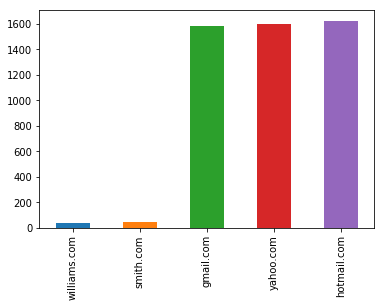

In [311]:
b = b.head(5)
b.plot(kind='bar')

** Plot distribution of Purchase Price **

C:\Users\tngo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


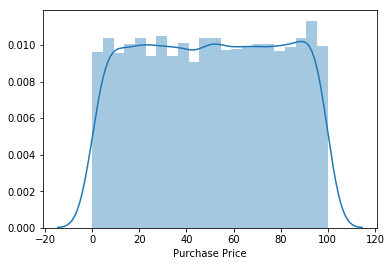

In [306]:
sns.distplot(ecom['Purchase Price'])
#Why the lines in red?

**Implement countplot on Language**

In [289]:
ecom['Language'].value_counts()

ru    1155
de    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: Language, dtype: int64

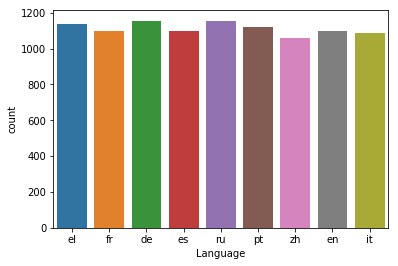

In [260]:
sns.countplot(x = 'Language', data=ecom)

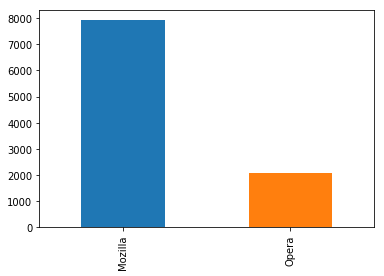

In [333]:
# which are the most popular browsers?
c= pd.Series(ecom['Browser Info']).str.split("/", n=-1, expand=True)[0].value_counts()
c.plot(kind = 'bar')


# Great Job!